# Systolic BP Regression Data

## importing all modules

In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import scale
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

import plotly   
from plotly.graph_objs import *
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)

# for OLS
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms

## importing data

In [2]:
Classification_Data = pd.read_csv('Ex03_SystolicBP_Classification.csv')
Regression_Data = pd.read_csv("Ex03_SystolicBP_Regreesion.csv")

## Description of Data

In [3]:
Regression_Data.describe()

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
count,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.44000,0.540000,0.440000,2.46000,1.480000,80.144936,1.608972,31.374440,115.586424
std,7.43228,0.500908,0.498888,1.09563,0.502117,9.699516,0.101457,5.794455,6.255289
min,33.00000,0.000000,0.000000,1.00000,1.000000,39.247748,1.392920,15.983278,102.161103
25%,45.00000,0.000000,0.000000,1.75000,1.000000,73.816154,1.539363,27.482580,111.019228
50%,50.00000,1.000000,0.000000,2.00000,1.000000,79.516118,1.613542,31.579012,115.199929
75%,55.25000,1.000000,1.000000,3.00000,2.000000,87.709559,1.669585,34.523879,119.539757
max,71.00000,1.000000,1.000000,4.00000,2.000000,100.565423,1.911226,47.524018,132.704641


## Correlation 

In [4]:
Regression_Data.corr()

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
Age,1.000000,-0.072606,0.075297,0.004664,-0.114006,-0.028380,0.151895,-0.126357,0.669539
Treated,-0.072606,1.000000,0.050122,-0.052271,-0.117269,-0.006899,-0.069158,0.033868,0.476901
Gender,0.075297,0.050122,1.000000,-0.152274,-0.004839,-0.003728,-0.002139,-0.007238,0.083053
FamilySize,0.004664,-0.052271,-0.152274,1.000000,0.071975,-0.038084,-0.178930,0.088567,0.020711
Diet,-0.114006,-0.117269,-0.004839,0.071975,1.000000,0.214507,-0.030904,0.150477,-0.071370
Weight,-0.028380,-0.006899,-0.003728,-0.038084,0.214507,1.000000,-0.100371,0.725423,0.361718
Height,0.151895,-0.069158,-0.002139,-0.178930,-0.030904,-0.100371,1.000000,-0.746394,-0.307311
ScaledBMI,-0.126357,0.033868,-0.007238,0.088567,0.150477,0.725423,-0.746394,1.000000,0.447285
SystolicBP,0.669539,0.476901,0.083053,0.020711,-0.071370,0.361718,-0.307311,0.447285,1.000000


## Scaling of Data

In [31]:
for i in Regression_Data.columns.tolist():
    Regression_Data[i] = (Regression_Data[i] - Regression_Data[i].mean())/(Regression_Data[i].var())

## Test and Train Data

In [32]:
df_x_train = Regression_Data.drop(['SystolicBP'], axis = 1).iloc[:-20]
df_y_train = Regression_Data.drop(['Age', 'Treated', 'Gender', 'FamilySize', 'Diet', 'Weight', 'Height', 'ScaledBMI'], axis = 1).iloc[:-20]

df_x_test = Regression_Data.drop(['SystolicBP'], axis = 1).iloc[80:]
df_y_test = Regression_Data.drop(['Age', 'Treated', 'Gender', 'FamilySize', 'Diet', 'Weight', 'Height', 'ScaledBMI'], axis = 1).iloc[80:]


## Correlation Plot

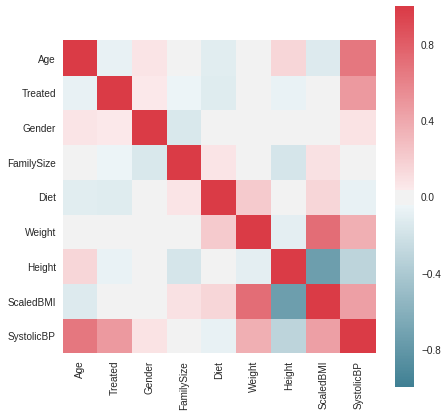

In [33]:
f, ax = plt.subplots(figsize=(7, 7))
correlation = Regression_Data.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), 
            cmap = sns.diverging_palette(220, 10, as_cmap=True), square=True, ax = ax)
plt.show()

## Linear Regression

In [34]:
reg = linear_model.LinearRegression()
reg.fit(df_x_train, df_y_train)

coefficients = reg.coef_.tolist()
intercept = reg.intercept_.tolist()
mean_square_error = np.mean((reg.predict(df_x_test) - df_y_test)**2)
mean_square_error

SystolicBP    0.000008
dtype: float64

In [35]:
variance = reg.score(df_x_test, df_y_test)
variance

0.99969848970405917

## Scatter Plot of Data

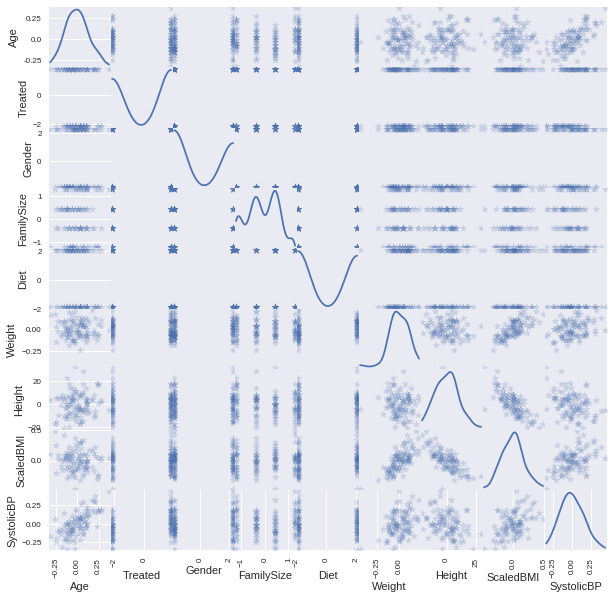

In [37]:
scatter_matrix(Regression_Data,alpha=0.2, figsize=(10, 10), diagonal='kde', grid=True, marker='*')
plt.show()

# Feature Selection

## Ridge Regression

In [38]:
alphas = 10**(np.linspace(-5,0,100))
Ridge_df = pd.DataFrame()
model = Ridge()
coeff =  []
for a in alphas:
    model.set_params(alpha = a)
    model.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df = pd.DataFrame({'Age':[model.coef_[0][0]],'Treated': [model.coef_[0][1]], 'Gender':[model.coef_[0][2]],
                       'FamilySize':[model.coef_[0][3]],'Diet':[model.coef_[0][4]], 'Weight':[model.coef_[0][5]], 
                       'Height': [model.coef_[0][6]], 'ScaledBMI': [model.coef_[0][7]]})
    Ridge_df = Ridge_df.append(df)

In [39]:
'Age', 'Treated', 'Gender', 'FamilySize', 'Diet', 'Weight', 'Height', 'ScaledBMI'
trace0 = Scatter(
    x = alphas,
    y = Ridge_df['Age'],
    name = 'Age',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
    )
trace1 = Scatter(
    x = alphas,
    y = Ridge_df['Treated'],
    name = 'Treated',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Ridge_df['Gender'],
    name = 'Gender',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Ridge_df['Diet'],
    name = 'Diet',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas,
    y = Ridge_df['Weight'],
    name = 'Weight',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas,
    y = Ridge_df['Height'],
    name = 'Height',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace6 = Scatter(
    x = alphas,
    y = Ridge_df['ScaledBMI'],
    name = 'ScaledBMI',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='RidgeRegression.html')

In [40]:
ridge2 = Ridge(alpha=0.005, normalize=True)
ridge2.fit(df_x_train, df_y_train.SystolicBP) # Fit a ridge regression on the training data
pred2 = ridge2.predict(df_x_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=df_x_train.columns)) # Print coefficients
print(mean_squared_error(df_y_test, pred2)) # Calculate the test MSE

Age           0.912634
Treated       0.040980
Gender        0.000216
FamilySize   -0.000186
Diet         -0.000324
Weight        0.108283
Height       -0.000984
ScaledBMI     0.398661
dtype: float64
1.16522932155e-05


In [41]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(df_x_train, df_y_train)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_

RidgeCV(alphas=array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='mean_squared_error', store_cv_values=False)

## Lasso

In [42]:
Lasso_df = pd.DataFrame()
coeff  = []
lasso = Lasso(max_iter = 10000, normalize = True)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df_new = pd.DataFrame({'Age':[model.coef_[0][0]],'Treated': [model.coef_[0][1]], 'Gender':[model.coef_[0][2]],
                       'FamilySize':[model.coef_[0][3]],'Diet':[model.coef_[0][4]], 'Weight':[model.coef_[0][5]], 
                       'Height': [model.coef_[0][6]], 'ScaledBMI': [model.coef_[0][7]]})
    Lasso_df = Lasso_df.append(df_new)

In [43]:
'Age', 'Treated', 'Gender', 'FamilySize', 'Diet', 'Weight', 'Height', 'ScaledBMI'
trace0 = Scatter(
    x = alphas,
    y = Lasso_df['Age'],
    name = 'Age',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
    )
trace1 = Scatter(
    x = alphas,
    y = Lasso_df['Treated'],
    name = 'Treated',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Lasso_df['Gender'],
    name = 'Gender',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Lasso_df['Diet'],
    name = 'Diet',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas,
    y = Lasso_df['Weight'],
    name = 'Weight',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas,
    y = Lasso_df['Height'],
    name = 'Height',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace6 = Scatter(
    x = alphas,
    y = Lasso_df['ScaledBMI'],
    name = 'ScaledBMI',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='LassoRegression.html')

In [44]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(df_x_train, df_y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(df_x_train, df_y_train)
mean_squared_error(df_y_test, lasso.predict(df_x_test))

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



8.8037234467081659e-06

In [45]:
pd.Series(lasso.coef_, index=df_x_test.columns)

Age           0.916878
Treated       0.041193
Gender        0.000141
FamilySize   -0.000000
Diet         -0.000127
Weight        0.015386
Height       -0.000000
ScaledBMI     0.481277
dtype: float64

In [46]:
# So only features we can take is Age, ScaledBMI

# Model Selection

## Model is by taking Age,Treated and ScaledBMI

In [48]:
model = sm.ols(formula = "SystolicBP ~ Age + Treated + ScaledBMI", 
                  data = Regression_Data[:80]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.095e+04
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          6.99e-131
Time:                        17:27:01   Log-Likelihood:                 352.22
No. Observations:                  80   AIC:                            -696.4
Df Residuals:                      76   BIC:                            -686.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.993e-05      0.000     -0.234      0.815      -0.001       0.001
Age            0.9195      0.003    358.485      0.000       0.914       0.925
Treated        0.0413      0.000    239.541      0.000       0.041       0.042
ScaledBMI      0.4887      0.002    244.853      0.000       0.485       0.493
==============================================================================
Omnibus:                        1.430   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                0.859
Skew:                           0.205   Prob(JB):                        0.651
Kurtosis:                       3.300   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

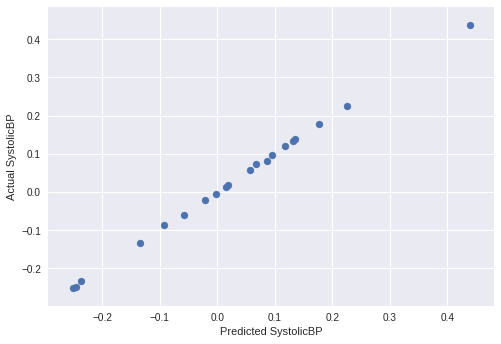

In [49]:
y_model = model.predict(df_x_test)
plt.scatter(y_model, df_y_test)
plt.xlabel("Predicted SystolicBP")
plt.ylabel("Actual SystolicBP")
plt.show()

In [50]:
SSE_new = ((y_model - df_y_test.SystolicBP)**2).sum()
mean = df_y_test.SystolicBP.mean()
TSS = ((y_model - mean)**2).sum()
R_Square_new = 1-(SSE_new/TSS)
RMSE = (((df_y_test.SystolicBP - mean)**2).sum()) * ((1 - R_Square_new)/100)
RMSE

1.99821101762315e-06

## Box Plot

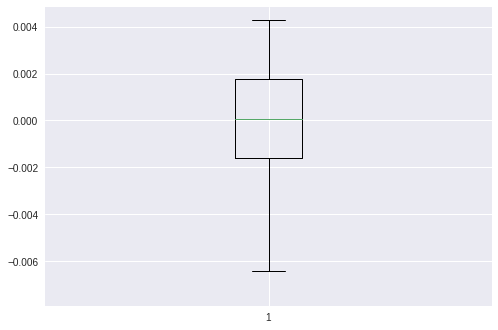

In [51]:
residual_new = np.array(y_model - df_y_test.SystolicBP)
plt.boxplot(residual_new)
plt.show()

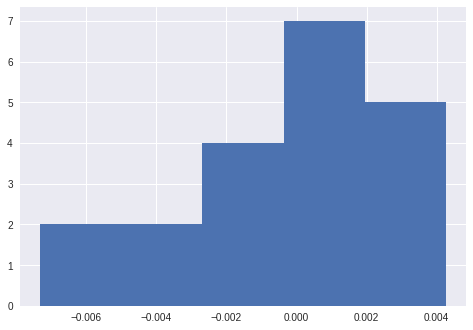

In [52]:
plt.hist(residual_new, bins=5)
plt.show()

## Test Hypothesis

In [53]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name,test))

[('F statistics', 0.99715039826373897), ('p_value', 0.5033916744127187)]